# Loading the Dataset 

In [9]:
import pandas as pd

df = pd.read_csv('meta_api_fake_call.csv')
print(df.head())

         Date     CampaignName  Impressions  Clicks  Spend  Revenue
0  2025-08-01      Summer Sale        12000     340  150.5    600.0
1  2025-08-01      Retargeting         8000     220  120.0    480.0
2  2025-08-01  Brand Awareness        20000     180   90.0      0.0
3  2025-08-02      Summer Sale        15000     420  180.0    750.0
4  2025-08-02      Retargeting         9000     250  130.0    500.0


# Changing values in case of an error if values does not exists

In [10]:
df['Impressions'] = pd.to_numeric(df['Impressions'], errors='coerce')
df['Clicks'] = pd.to_numeric(df['Clicks'], errors='coerce')
df['Spend'] = pd.to_numeric(df['Spend'], errors='coerce')
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce')

# Making CTR, CPC and ROAS column for better view 

In [11]:
df['CTR (%)'] = (df['Clicks'] / df['Impressions']) * 100
df['CPC ($)'] = df['Spend'] / df['Clicks']
df['ROAS'] = df['Revenue'] / df['Spend'] 

print(df.head())

         Date     CampaignName  Impressions  Clicks  Spend  Revenue   CTR (%)  \
0  2025-08-01      Summer Sale        12000     340  150.5    600.0  2.833333   
1  2025-08-01      Retargeting         8000     220  120.0    480.0  2.750000   
2  2025-08-01  Brand Awareness        20000     180   90.0      0.0  0.900000   
3  2025-08-02      Summer Sale        15000     420  180.0    750.0  2.800000   
4  2025-08-02      Retargeting         9000     250  130.0    500.0  2.777778   

    CPC ($)      ROAS  
0  0.442647  3.986711  
1  0.545455  4.000000  
2  0.500000  0.000000  
3  0.428571  4.166667  
4  0.520000  3.846154  


# Campaign summary

In [12]:
campaign_summary = df.groupby('CampaignName').agg({
    'Impressions':'sum',
    'Clicks':'sum',
    'Spend':'sum',
    'Revenue':'sum'
}).reset_index()

campaign_summary['CTR (%)'] = (campaign_summary['Clicks'] / campaign_summary['Impressions']) * 100
campaign_summary['CPC ($)'] = campaign_summary['Spend'] / campaign_summary['Clicks']
campaign_summary['ROAS'] = campaign_summary['Revenue'] / campaign_summary['Spend']

print(campaign_summary)

      CampaignName  Impressions  Clicks  Spend  Revenue   CTR (%)   CPC ($)  \
0  Brand Awareness        63000     570  285.0      0.0  0.904762  0.500000   
1      Retargeting        26500     740  385.0   1500.0  2.792453  0.520270   
2      Summer Sale        41000    1160  505.5   2070.0  2.829268  0.435776   

       ROAS  
0  0.000000  
1  3.896104  
2  4.094955  


# Daily campaing summary

In [13]:
daily_summary = df.groupby('Date').agg({
    'Impressions':'sum',
    'Clicks':'sum',
    'Spend':'sum',
    'Revenue':'sum'
}).reset_index()

daily_summary['CTR (%)'] = (daily_summary['Clicks'] / daily_summary['Impressions']) * 100
daily_summary['CPC ($)'] = daily_summary['Spend'] / daily_summary['Clicks']
daily_summary['ROAS'] = daily_summary['Revenue'] / daily_summary['Spend']

print(daily_summary)

         Date  Impressions  Clicks  Spend  Revenue   CTR (%)   CPC ($)  \
0  2025-08-01        40000     740  360.5   1080.0  1.850000  0.487162   
1  2025-08-02        46000     870  410.0   1250.0  1.891304  0.471264   
2  2025-08-03        44500     860  405.0   1240.0  1.932584  0.470930   

       ROAS  
0  2.995839  
1  3.048780  
2  3.061728  


# Making tables for better view of the marketing spend adn success

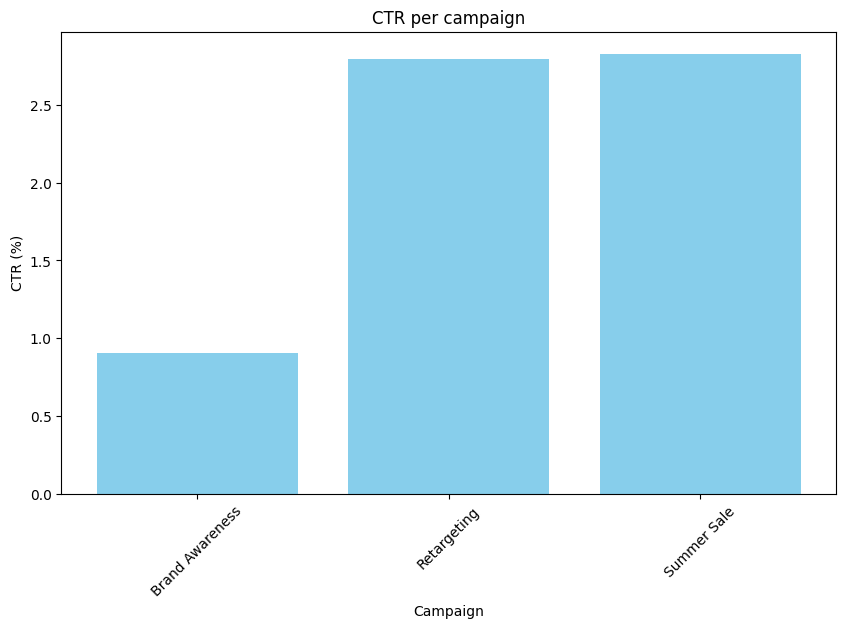

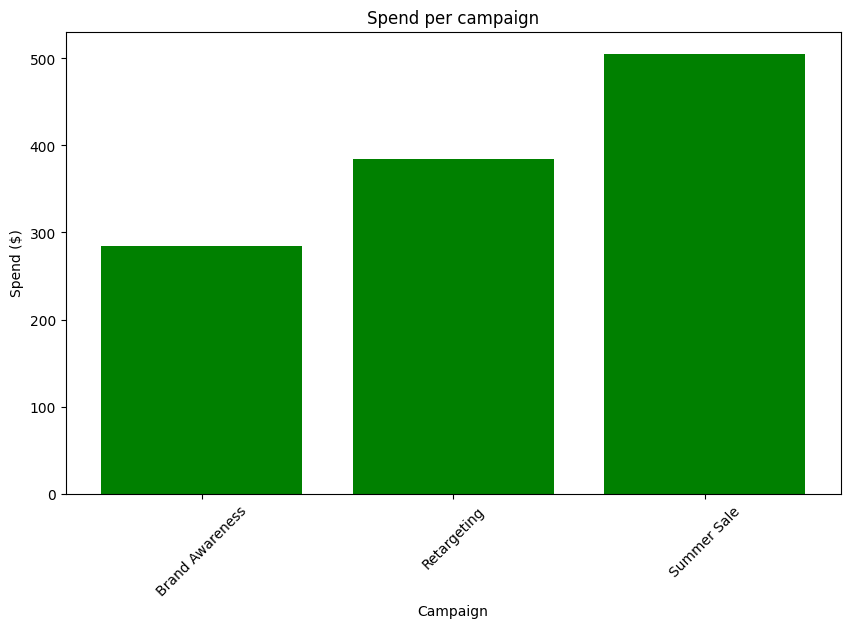

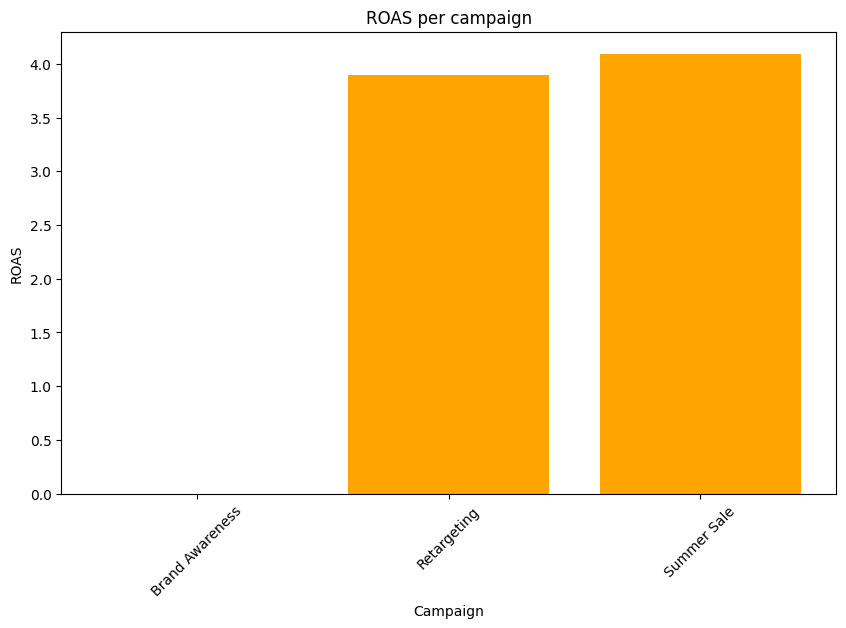

In [14]:
import matplotlib.pyplot as plt

# CTR per capaign
plt.figure(figsize=(10,6))
plt.bar(campaign_summary['CampaignName'], campaign_summary['CTR (%)'], color='skyblue')
plt.title("CTR per campaign")
plt.ylabel("CTR (%)")
plt.xlabel("Campaign")
plt.xticks(rotation=45)
plt.show()

# Spend per campaign
plt.figure(figsize=(10,6))
plt.bar(campaign_summary['CampaignName'], campaign_summary['Spend'], color='green')
plt.title("Spend per campaign")
plt.ylabel("Spend ($)")
plt.xlabel("Campaign")
plt.xticks(rotation=45)
plt.show()

# ROAS per campaign
plt.figure(figsize=(10,6))
plt.bar(campaign_summary['CampaignName'], campaign_summary['ROAS'], color='orange')
plt.title("ROAS per campaign")
plt.ylabel("ROAS")
plt.xlabel("Campaign")
plt.xticks(rotation=45)
plt.show()

In [15]:
# CSV failes
campaign_summary.to_csv('campaign_summary.csv', index=False)
daily_summary.to_csv('daily_summary.csv', index=False)

# Excel with two sheets
with pd.ExcelWriter('ad_report.xlsx') as writer:
    campaign_summary.to_excel(writer, sheet_name='Campaign Summary', index=False)
    daily_summary.to_excel(writer, sheet_name='Daily Summary', index=False)

print("✅ Reports generated: CSV + Excel")

✅ Reports generated: CSV + Excel
